# WebKB-Cornell

In [1]:
import pandas as pd
import networkx as nx
from methods import find_groups
from torch_geometric.datasets import WebKB
from ablation_metrics import compare_subgroups, evaluate_pattern_subgroups
import matplotlib.pyplot as plt

In [2]:
dataset = WebKB(root='./data/WebKB', name='Cornell')

data = dataset[0]

print(f"Number of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")
print(f"Node feature matrix shape: {data.x.shape}")
print(f"Number of classes: {data.y.unique().size(0)}")
print(f"First node's features: {data.x[0]}")


Number of nodes: 183
Number of edges: 298
Node feature matrix shape: torch.Size([183, 1703])
Number of classes: 5
First node's features: tensor([0., 0., 0.,  ..., 0., 0., 0.])


Processing...
Done!


In [3]:
class CustomGraphDataset:
    def __init__(self, dataset):
        self.dataset = dataset

    def __getitem__(self, idx):
        graph_data = self.dataset[idx]
        
        graph = {
            'edge_index': graph_data.edge_index,
            'num_nodes': graph_data.num_nodes,
            'node_feat': graph_data.x
        }
        
        labels = graph_data.y
        return graph, labels

    def __len__(self):
        return len(self.dataset)

custom_dataset = CustomGraphDataset(dataset)
graph, label = custom_dataset[0]


In [4]:
edge_index = data.edge_index
num_nodes = data.num_nodes 
G = nx.Graph()

G.add_nodes_from(range(num_nodes))

edges = list(zip(edge_index[0].tolist(), edge_index[1].tolist()))
G.add_edges_from(edges)

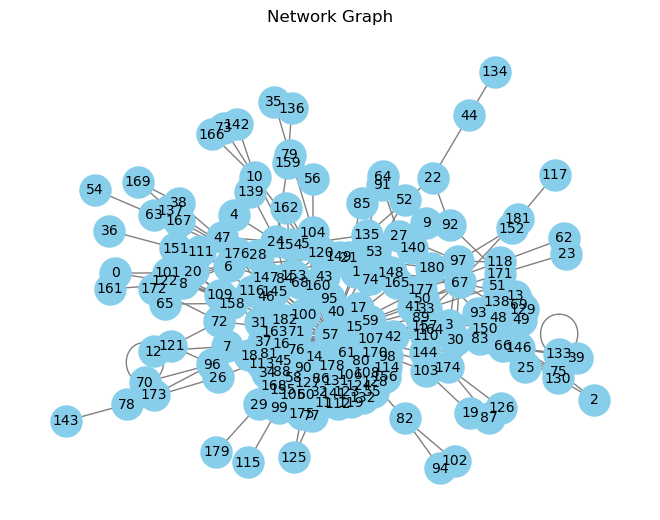

In [5]:
nx.draw(G, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500, font_size=10)
plt.title("Network Graph")
plt.show()

In [6]:
academic_classes = [0, 1, 2]
binary_target = data.y.apply_(lambda x: 1 if x in academic_classes else 0)
binary_target

tensor([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
        1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
        0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1])

In [7]:
attributes = graph['node_feat']
lu = pd.DataFrame(attributes)
lu['target'] = binary_target == 1
lu.head()

,0,1,2,3,4,5,6,7,8,9,...,1694,1695,1696,1697,1698,1699,1700,1701,1702,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [8]:
result_normal = find_groups(G, 20, lu, ablation_mode=False)
result_normal

100%|██████████| 183/183 [00:44<00:00,  4.14it/s]


,rho,sigma,q,ranks,reference,subgroup
node,,,,,,
78,22,4,0.242274,"[(78, True), (26, False), (143, True), (57, Tr...","[78, 26, 143, 57, 170, 119, 14, 59, 168, 18, 5...","[78, 26, 143, 57]"
60,24,4,0.238145,"[(60, True), (57, True), (119, False), (59, Tr...","[60, 57, 119, 59, 168, 18, 132, 174, 157, 131,...","[60, 57, 119, 59]"
76,36,4,0.231481,"[(76, True), (57, True), (60, True), (127, Tru...","[76, 57, 60, 127, 119, 168, 174, 59, 45, 14, 1...","[76, 57, 60, 127]"
135,36,11,0.228925,"[(135, True), (64, True), (5, False), (57, Tru...","[135, 64, 5, 57, 22, 110, 18, 103, 45, 92, 59,...","[135, 64, 5, 57, 22, 110, 18, 103, 45, 92, 59]"
165,36,5,0.225677,"[(165, False), (149, True), (67, True), (97, T...","[165, 149, 67, 97, 57, 174, 110, 119, 144, 157...","[165, 149, 67, 97, 57]"
30,43,6,0.224416,"[(30, False), (25, True), (67, True), (146, Tr...","[30, 25, 67, 146, 57, 66, 110, 13, 144, 174, 1...","[30, 25, 67, 146, 57, 66]"
113,33,3,0.219281,"[(113, True), (57, True), (60, True), (119, Fa...","[113, 57, 60, 119, 59, 168, 40, 157, 174, 18, ...","[113, 57, 60]"
157,19,3,0.202165,"[(157, False), (48, True), (57, True), (119, F...","[157, 48, 57, 119, 174, 18, 168, 59, 131, 170,...","[157, 48, 57]"
59,20,3,0.200104,"[(59, True), (57, True), (119, False), (168, F...","[59, 57, 119, 168, 18, 131, 170, 98, 157, 174,...","[59, 57, 119]"


In [9]:
result_normal.to_csv('subgroups_cornell.csv')

In [10]:
result_ablation = find_groups(G, 20, lu, ablation_mode=True)
result_ablation

100%|██████████| 183/183 [00:42<00:00,  4.32it/s]


,rho,sigma,q,ranks,reference,subgroup
node,,,,,,
156,183,37,0.145633,"[(156, False), (57, True), (18, False), (98, F...","[156, 57, 18, 98, 124, 119, 45, 157, 168, 174,...","[156, 57, 18, 98, 124, 119, 45, 157, 168, 174,..."
109,183,31,0.135815,"[(109, False), (20, False), (122, False), (57,...","[109, 20, 122, 57, 8, 6, 101, 119, 98, 59, 178...","[109, 20, 122, 57, 8, 6, 101, 119, 98, 59, 178..."
107,183,26,0.129525,"[(107, False), (57, True), (119, False), (157,...","[107, 57, 119, 157, 174, 18, 170, 168, 59, 132...","[107, 57, 119, 157, 174, 18, 170, 168, 59, 132..."
155,183,20,0.118687,"[(155, False), (168, False), (99, False), (57,...","[155, 168, 99, 57, 119, 18, 59, 131, 124, 132,...","[155, 168, 99, 57, 119, 18, 59, 131, 124, 132,..."
32,183,10,0.103085,"[(32, True), (57, True), (113, True), (60, Tru...","[32, 57, 113, 60, 107, 80, 114, 127, 59, 82, 4...","[32, 57, 113, 60, 107, 80, 114, 127, 59, 82]"
33,183,6,0.097957,"[(33, True), (57, True), (51, True), (86, True...","[33, 57, 51, 86, 31, 141, 18, 119, 177, 103, 1...","[33, 57, 51, 86, 31, 141]"
81,183,6,0.097957,"[(81, True), (57, True), (31, True), (141, Tru...","[81, 57, 31, 141, 86, 177, 14, 42, 119, 18, 16...","[81, 57, 31, 141, 86, 177]"
111,183,6,0.097957,"[(111, True), (116, True), (57, True), (77, Tr...","[111, 116, 57, 77, 53, 45, 18, 59, 112, 124, 4...","[111, 116, 57, 77, 53, 45]"
153,183,24,0.090783,"[(153, True), (160, False), (120, False), (176...","[153, 160, 120, 176, 57, 119, 18, 38, 59, 168,...","[153, 160, 120, 176, 57, 119, 18, 38, 59, 168,..."


In [11]:
comparison = compare_subgroups(result_normal, result_ablation, k=10)
comparison

{'avg_q_normal': 0.22110181586920122,
 'avg_q_ablation': 0.11034318194466348,
 'avg_ref_size_normal': 30.9,
 'avg_ref_size_ablation': 183.0,
 'avg_sub_size_normal': 4.6,
 'avg_sub_size_ablation': 20.6,
 'avg_subgroup_overlap': 0.08989953293832603}

In [12]:
mean_ratio_normal, dist_ratios_normal = evaluate_pattern_subgroups(result_normal, lu, k=10)
mean_ratio_ablation, dist_ratios_ablation = evaluate_pattern_subgroups(result_ablation, lu, k=10)

print("Avg fraction of target=1 in top-10 normal subgroups: ", mean_ratio_normal)
print("Avg fraction of target=1 in top-10 ablation subgroups:", mean_ratio_ablation)

Avg fraction of target=1 in top-10 normal subgroups:  0.8103030303030302
Avg fraction of target=1 in top-10 ablation subgroups: 0.48628853419176005


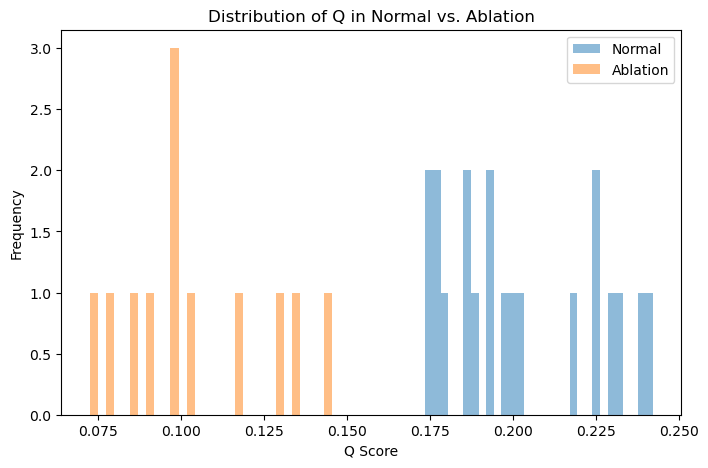

In [13]:
plt.figure(figsize=(8,5))
plt.hist(result_normal['q'], bins=30, alpha=0.5, label='Normal')
plt.hist(result_ablation['q'], bins=30, alpha=0.5, label='Ablation')
plt.xlabel('Q Score')
plt.ylabel('Frequency')
plt.title('Distribution of Q in Normal vs. Ablation')
plt.legend()
plt.show()